In [1]:
from numpy import *
from pylab import *
from netCDF4 import Dataset
%matplotlib inline

In [10]:
path_input='../../data.input/MOM6/mom01_salt1year/'

In [12]:
NCdepth=Dataset(path_input+'topog.nc')
depth=NCdepth.variables['depth'][:,:]

(2700, 3600)


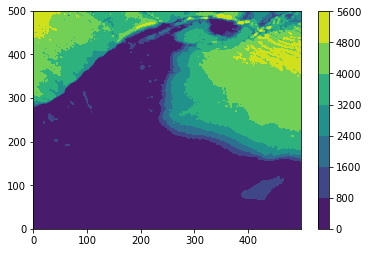

In [18]:
contourf(depth[0:500,2000:2500])
colorbar()
print(shape(depth))

In [31]:
NCsalt_restore=Dataset(path_input+'salt_restore.nc')
print(NCsalt_restore)
salt=NCsalt_restore.variables['salt'][:,:,:]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    filename: regrid_2d_sss.nc
    history: Tue Nov 19 15:48:56 2013: ncks -d grid_y_T,160,173 -d grid_x_T,286,308 .datasets/GOLD_SIS/riga/INPUT/salt_restore.nc salt_restore.nc
    NCO: 4.0.8
    dimensions(sizes): TIME(12), grid_x_T(23), grid_y_T(14)
    variables(dimensions): float64 TIME(TIME), float32 grid_x_T(grid_x_T), float32 grid_y_T(grid_y_T), float64 salt(TIME,grid_y_T,grid_x_T), float64 x_T(grid_y_T,grid_x_T), float64 y_T(grid_y_T,grid_x_T)
    groups: 



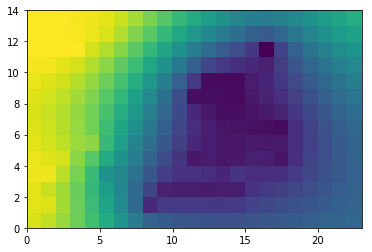

In [44]:
pcolor(salt[1,:,:])

In [46]:
NCgold=Dataset(path_input+'GOLD_IC.2010.11.15.nc')
gold=NCgold.variables['salt'][:,:,:]

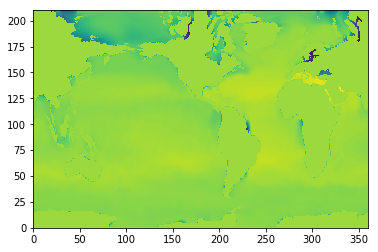

In [47]:
pcolor(gold[1,:,:])

In [49]:
GEBCONC=Dataset('../../GEBCO/GEBCO_2014_2D.nc')

In [50]:
GEBCONC

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    title: The GEBCO_2014 Grid - a continuous terrain model for oceans and land at 30 arc-second intervals.
    institution: On behalf of the General Bathymetric Chart of the Oceans (GEBCO), the data are held at the British Oceanographic Data Centre (BODC).
    source: The bathymetric portion of the GEBCO_2014 Grid was largely developed from a database of ship track soundings with interpolation between soundings guided by satellite-derived gravity data. In areas where they improve on this existing base grid, data sets developed by other methods are included. Recognising the importance of local expertise when building a global bathymetric model, GEBCO have been working with regional mapping groups to improve the existing GEBCO grid. Details about the development of the grid and the data sets included can be found in the documentation that accompanies the data set. Wit

In [62]:
elevation=GEBCONC.variables['elevation'][:,:]
lat=GEBCONC.variables['lat'][:]
lon=GEBCONC.variables['lon'][:]

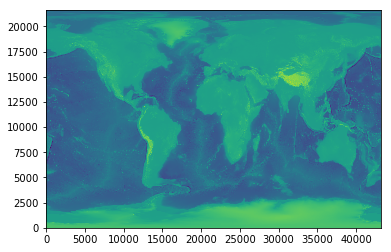

In [52]:
pcolormesh(elevation)

In [53]:
elevation[elevation>=0]=0

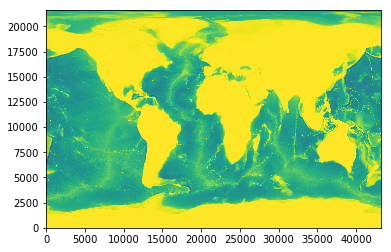

In [54]:
pcolormesh(elevation)

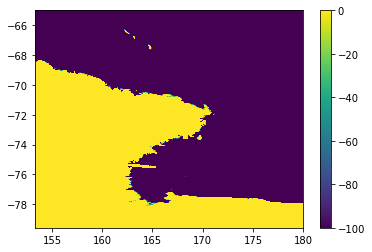

In [65]:
lonm=lon[40000::]
latm=lat[1250:3000]
pcolormesh(lonm,latm,elevation[1250:3000,40000::],vmin=-100,vmax=0)
colorbar()

In [69]:
newlon=linspace(lonm.min(),lonm.max(),23)
newlat=linspace(latm.min(),latm.max(),14)


In [77]:
from scipy import interpolate
f = interpolate.interp2d(lonm, latm, elevation[1250:3000,40000::], kind='cubic')

In [80]:
newelev=f(newlon,newlat)
newelev[newelev>0]=0

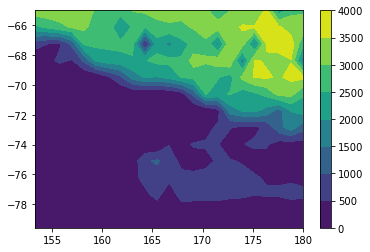

In [87]:
contourf(newlon,newlat,-newelev)
colorbar()

In [89]:
NCdepth

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Mon Nov 18 12:05:51 2013: ncks -d ny,160,173 -d nx,286,308 /archive/gold/datasets/GOLD_SIS/riga/mosaic.unpacked/topog.nc topog.nc
    dimensions(sizes): ny(14), nx(23), ntiles(1)
    variables(dimensions): float64 depth(ny,nx)
    groups: 

In [16]:
topogfullNC=Dataset('../../GEBCO/topog.nc')

In [17]:
fulldepth=topogfullNC.variables['depth']
print(fulldepth)

<class 'netCDF4._netCDF4.Variable'>
float64 depth(ny, nx)
    standard_name: topographic depth at T-cell centers
    units: meters
unlimited dimensions: 
current shape = (210, 360)
filling off



(210, 360)


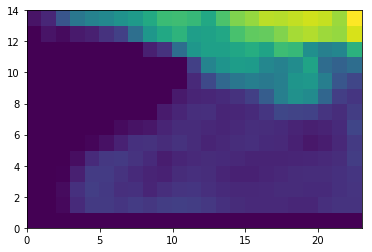

In [18]:
print(shape(fulldepth))
pcolormesh(fulldepth[0:14,80:103])

In [15]:
import sys
import numpy as np
import netCDF4 as nc4
from datetime import datetime

j0=sys.argv[0]
j1=sys.argv[1]
i0=sys.argv[2]
i1=sys.argv[3]

inputfile=sys.argv[4]
outputfile=sys.argv[5]

topogfullNC=nc4.Dataset(inputfile)
globaldepth=topogfullNC.variables['depth']
regiondepth=globaldepth[j0:j1,i0:i1]

f = nc4.Dataset(outputfile,'w', format='NETCDF4')
ny=f.createDimension('ny', np.shape(regiondepth)[0])
nx=f.createDimension('nx', np.shape(regiondepth)[1])
ntiles=f.createDimension('ntiles', 1)

ny = range(0,np.shape(regiondepth)[0])
nx = range(0,np.shape(regiondepth)[1])
ntiles = 1

depth = f.createVariable('depth', 'ny', 'nx')
depth = regiondepth
f.history = today.strftime("%d/%m/%y") + "python topography_subregion.py " + j0 + j1 + i0 + i1+ inputfile +" "+ outputfile 
f.close()

IndexError: list index out of range